<a href="https://colab.research.google.com/github/Vidarr22/BML-LCA-2-3-./blob/main/Prac(1%2C2%2C3%2C4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=columns)

# Preview
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


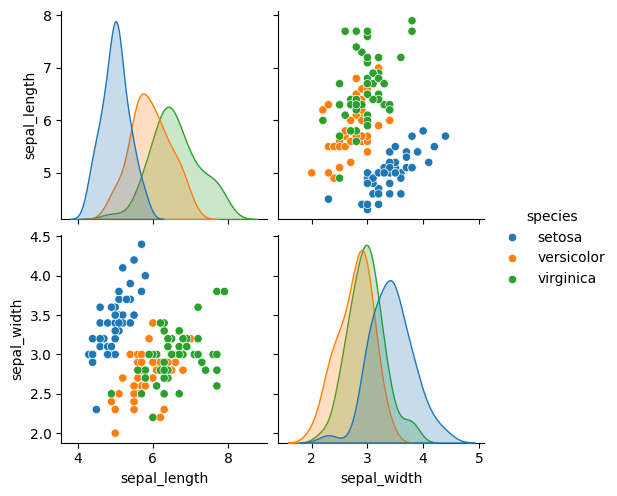

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset("iris")

# Select fewer variables to plot
selected_vars = ["sepal_length", "sepal_width"]

# Create the pairplot
sns.pairplot(iris, hue="species", vars=selected_vars)
plt.show()


Linear Regression

Slope: 1.8584329782548412
Intercept: -7.101443369602455


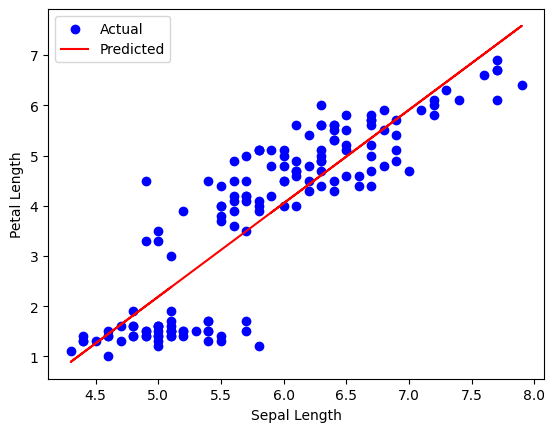

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the iris dataset
iris = sns.load_dataset("iris")

# Features (X) and target (y)
X = iris[['sepal_length']]
y = iris['petal_length']

# Model
model = LinearRegression()
model.fit(X, y)

# Coefficients
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

# Predict
preds = model.predict(X)

# Optional: Plot the regression line
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, preds, color='red', label='Predicted')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y, preds))
print("R²:", r2_score(y, preds))


MSE: 0.7430610341321241
R²: 0.759954645772515


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 1.0


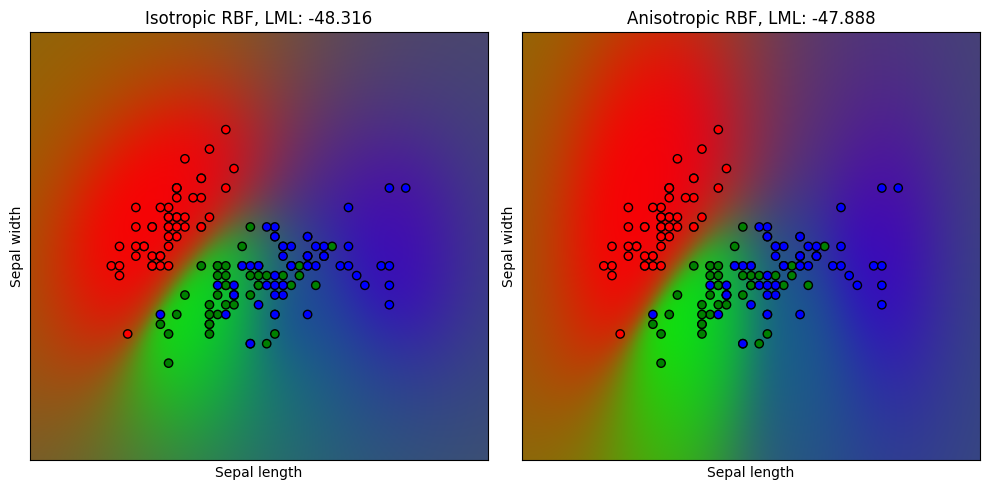

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Load iris dataset and slice features
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only sepal length and width
y = iris.target.astype(int)

# Mesh step size
h = 0.02

# Define kernels
isotropic_kernel = 1.0 * RBF(length_scale=1.0)
anisotropic_kernel = 1.0 * RBF(length_scale=[1.0, 1.0])

# Fit classifiers
gpc_iso = GaussianProcessClassifier(kernel=isotropic_kernel).fit(X, y)
gpc_aniso = GaussianProcessClassifier(kernel=anisotropic_kernel).fit(X, y)

# Mesh grid boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Titles and classifiers
titles = ["Isotropic RBF", "Anisotropic RBF"]
classifiers = [gpc_iso, gpc_aniso]

# Plotting
plt.figure(figsize=(10, 5))
for i, clf in enumerate(classifiers):
    plt.subplot(1, 2, i + 1)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower", aspect='auto')
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors='k')
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(f"{titles[i]}, LML: {clf.log_marginal_likelihood(clf.kernel_.theta):.3f}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("GaussianNB Accuracy:", GaussianNB().fit(X_train, y_train).score(X_test, y_test))



GaussianNB Accuracy: 0.9777777777777777


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In Built Method

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

df = pd.DataFrame(x, columns=iris.feature_names)
df['target'] = y
df.head()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [ ]:
import numpy as np
from collections import Counter

# Function to calculate Euclidean Distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

# KNN prediction function
def knn_(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))

    # Sort by distance
    distances.sort(key=lambda x: x[0])

    # Take k nearest labels
    k_nearest_labels = [label for _, label in distances[:k]]

    # Return most common label
    return Counter(k_nearest_labels).most_common(1)[0][0]

# Example dataset
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 2

# Prediction
prediction = knn_(training_data, training_labels, test_point, k)
print("Predicted Class:", prediction)

Predicted Class: A


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "target"
]

data = pd.read_csv(url, names=columns)

# Step 2: Clean dataset

# Replace "?" with NaN
data.replace("?", np.nan, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Convert all columns to numeric
data = data.apply(pd.to_numeric)

# Target: collapse into binary classification (0 = no disease, 1 = disease)
data["target"] = (data["target"] > 0).astype(int)

# Step 3: Features and labels

X = data.drop("target", axis=1).values
y = data["target"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define Euclidean distance + KNN

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def knn_(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))

    # Sort by distance
    distances.sort(key=lambda x: x[0])

    # Take k nearest labels
    k_nearest_labels = [label for _, label in distances[:k]]

    # Return most common label
    return Counter(k_nearest_labels).most_common(1)[0][0]

# Step 5: Test predictions

k = 5
predictions = []

for test_point in X_test:
    pred = knn_(X_train, y_train, test_point, k)
    predictions.append(pred)

# Step 6: Evaluate accuracy

accuracy = np.mean(predictions == y_test)
print(f"KNN Accuracy (k={k}): {accuracy:.2f}")



KNN Accuracy (k=5): 0.68


Logistic Regression Binomial

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 96.49%


Multinomial

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

digits = datasets.load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

reg = linear_model.LogisticRegression(max_iter=10000, random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"Logistic Regression model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")

Logistic Regression model accuracy: 96.66%
